# Case Study Feature Importance Analysis & Model Interpretation

## Import Library

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

In [2]:
!pip install numpy==1.24.4 --force-reinstall
!pip install scipy==1.11.4 --force-reinstall

  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl (44.3 MB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.24.4

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.24.4:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ------------

In [1]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\MyBook Hype AMD\anaconda3\envs\DiBimbing\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [3]:
df = pd.read_csv("D:/MATERI VIDEO/EXTRA CLASS 9/DATA_SET/bank_churn_data.csv")
df.head()

user_id     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
# Cek data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

## Inspection

In [5]:
# check null values inside dataset
df.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# ========================================
# 3. Bersihkan Data
# ========================================

# Drop kolom yang tidak dibutuhkan
df = df.drop(['user_id'], axis=1)

In [8]:
# Ubah target jadi biner (0 = existing, 1 = churn)
df['churn'] = df['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [9]:
# Drop kolom asli karena sudah dibuat versi numeriknya
df = df.drop(['attrition_flag'], axis=1)

In [10]:
# cek kolom kategori yang mempunyai missing value 'Unknow'
def show_unique_values(df, columns):
    for col in columns:
        print(f"\n Kolom: {col}")
        print("Nilai unik:", df[col].unique())
        print("\nFrekuensi tiap nilai:")
        print(df[col].value_counts())
        print("-" * 50)

In [11]:
cols_to_check = ['gender', 'education_level', 'marital_status', 'income_category', 'card_category']
show_unique_values(df, cols_to_check)


 Kolom: gender
Nilai unik: ['M' 'F']

Frekuensi tiap nilai:
gender
F    5358
M    4769
Name: count, dtype: int64
--------------------------------------------------

 Kolom: education_level
Nilai unik: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Frekuensi tiap nilai:
education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
--------------------------------------------------

 Kolom: marital_status
Nilai unik: ['Married' 'Single' 'Unknown' 'Divorced']

Frekuensi tiap nilai:
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
--------------------------------------------------

 Kolom: income_category
Nilai unik: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Frekuensi tiap nilai:
income_category
Less than $40K    3

In [12]:
cols_with_unknown = ['education_level', 'marital_status', 'income_category']

# persentase 'Unknown' di tiap kolom
for col in cols_with_unknown:
    total = len(df)
    unknown_count = df[df[col] == 'Unknown'].shape[0]
    percent_unknown = (unknown_count / total) * 100

    print(f"{col}: {unknown_count} baris ({percent_unknown:.2f}%) mengandung 'Unknown'")


education_level: 1519 baris (15.00%) mengandung 'Unknown'
marital_status: 749 baris (7.40%) mengandung 'Unknown'
income_category: 1112 baris (10.98%) mengandung 'Unknown'


In [13]:
# Daftar kolom kategori yang mengandung 'Unknown'
cols_with_unknown = ['education_level', 'marital_status', 'income_category']

# Ganti 'Unknown' jadi 'Missing'
for col in cols_with_unknown:
    df[col] = df[col].replace('Unknown', 'Missing')

# Cek hasil setelah diganti
for col in cols_with_unknown:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())



Kolom: education_level
education_level
Graduate         3128
High School      2013
Missing          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Kolom: marital_status
marital_status
Married     4687
Single      3943
Missing      749
Divorced     748
Name: count, dtype: int64

Kolom: income_category
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Missing           1112
$120K +            727
Name: count, dtype: int64


In [14]:
# Tangani Missing Value di Kolom Kategorikal
# Daftar kolom kategori yang mengandung 'Unknown'
cols_with_unknown = ['education_level', 'marital_status', 'income_category']

# Ganti 'Unknown' jadi 'Missing'
for col in cols_with_unknown:
    df[col] = df[col].replace('Unknown', 'Missing')

# Cek hasil setelah diganti
for col in cols_with_unknown:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())



Kolom: education_level
education_level
Graduate         3128
High School      2013
Missing          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Kolom: marital_status
marital_status
Married     4687
Single      3943
Missing      749
Divorced     748
Name: count, dtype: int64

Kolom: income_category
income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Missing           1112
$120K +            727
Name: count, dtype: int64


**Alasan tidak langsung menghapus nilai 'Unknown' pada kolom kategorikal:**

1. 'Unknown' tidak selalu berarti data error.
   Nilai ini sering menunjukkan pelanggan yang tidak mengisi informasi tertentu
   (misalnya pendidikan atau pendapatan). Informasi seperti ini bisa menjadi pola
   perilaku yang berhubungan dengan churn — misalnya pelanggan yang tidak melengkapi
   data pribadinya justru lebih berisiko churn.

2. Menghapus baris dengan nilai 'Unknown' berpotensi menghilangkan terlalu banyak data.
   Dalam dataset ini, proporsi nilai 'Unknown' pada beberapa kolom seperti
   education_level (15%), income_category (11%), dan marital_status (7%)
   cukup besar. Jika semua baris tersebut dihapus, maka sekitar 30% data akan hilang,
   sehingga model kehilangan banyak informasi penting.

3. Model seperti Random Forest dan XGBoost toleran terhadap kategori tambahan.
   Dengan mengganti 'Unknown' menjadi 'Missing', model masih bisa belajar dari pola
   pelanggan dengan data tidak lengkap. Ini juga membantu analisis interpretabilitas
   untuk mengetahui apakah pelanggan dengan data tidak lengkap lebih rentan churn.

4. Data hanya akan di-drop jika proporsi 'Unknown' terlalu besar (misalnya > 40%)
   atau kolom tersebut dianggap tidak relevan dengan analisis churn.

Kesimpulan:
Daripada menghapus, nilai 'Unknown' sebaiknya diganti menjadi 'Missing'
agar informasi tetap terjaga dan model dapat belajar dari pola tersebut.

## Exploratory Data Analysis (EDA)

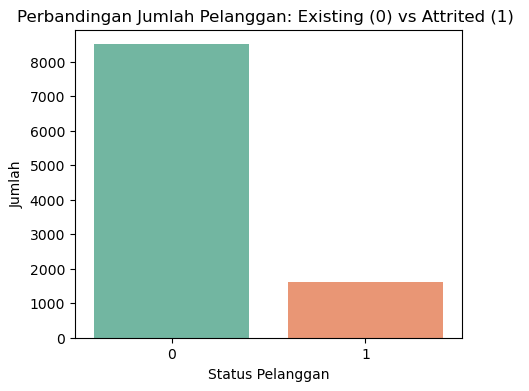

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Perbandingan Jumlah Pelanggan: Existing (0) vs Attrited (1) ')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah')
plt.show()

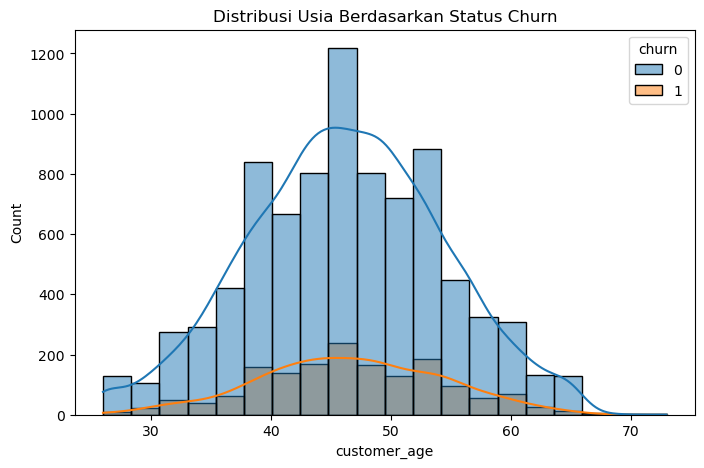

In [16]:
# ========================================
# 4. EDA (Exploratory Data Analysis)
# ========================================

# 4.1 Distribusi usia dan churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='customer_age', hue='churn', kde=True, bins=20)
plt.title('Distribusi Usia Berdasarkan Status Churn')
plt.show()


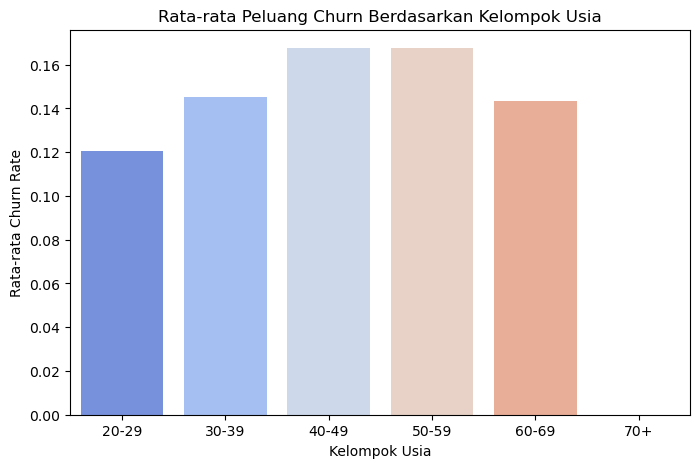

age_group     churn
0     20-29  0.120755
1     30-39  0.145403
2     40-49  0.167455
3     50-59  0.167602
4     60-69  0.143564
5       70+  0.000000

In [17]:
df['age_group'] = pd.cut(df['customer_age'], bins=[20, 30, 40, 50, 60, 70, 80],
                         labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# Hitung tingkat churn per kelompok usia
age_churn = df.groupby('age_group')['churn'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='churn', data=age_churn, palette='coolwarm')
plt.title('Rata-rata Peluang Churn Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Churn Rate')
plt.show()

age_churn


In [18]:
# Hapus kolom age_group
df = df.drop(columns=['age_group'], errors='ignore')

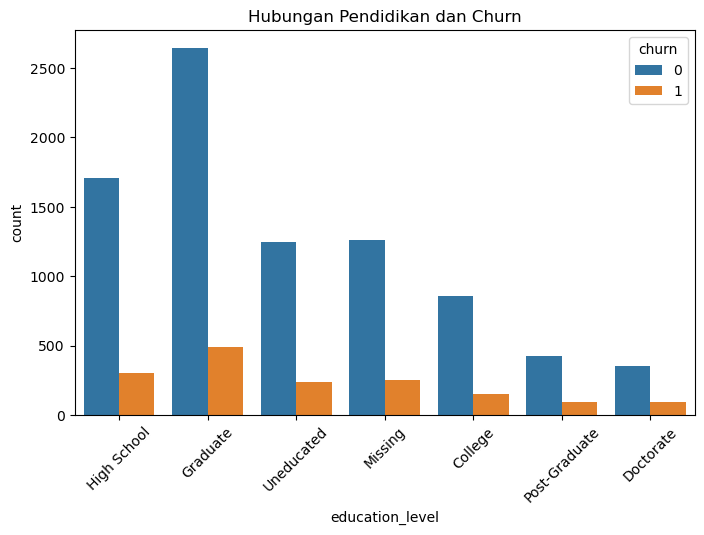

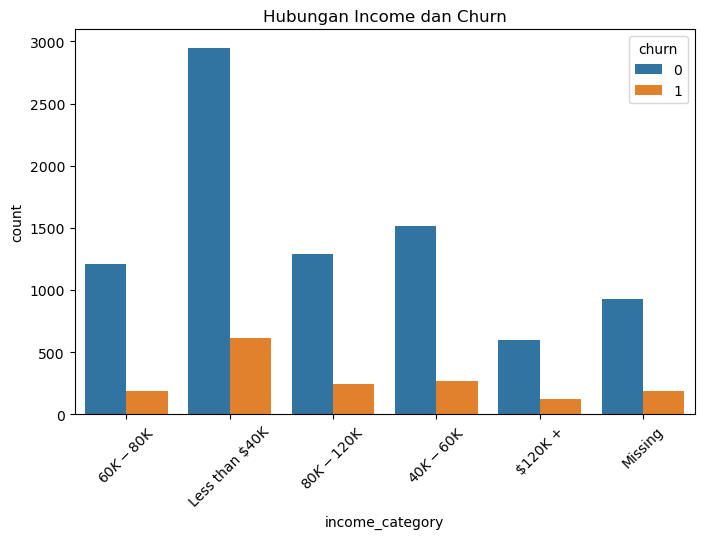

In [19]:
# 4.2 Pendidikan dan income vs churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education_level', hue='churn')
plt.title('Hubungan Pendidikan dan Churn')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='income_category', hue='churn')
plt.title('Hubungan Income dan Churn')
plt.xticks(rotation=45)
plt.show()

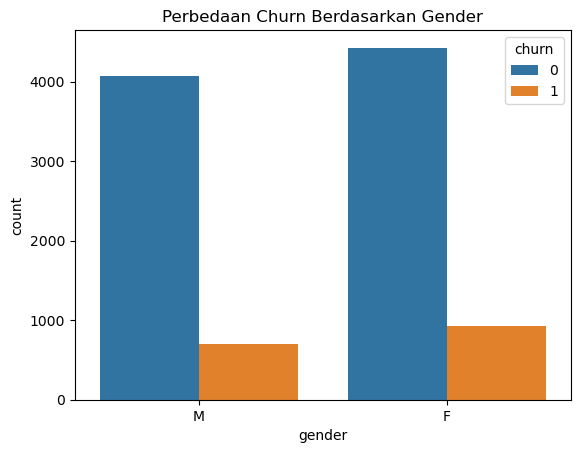

In [20]:
# 4.3 Perbedaan churn berdasarkan gender
sns.countplot(data=df, x='gender', hue='churn')
plt.title('Perbedaan Churn Berdasarkan Gender')
plt.show()

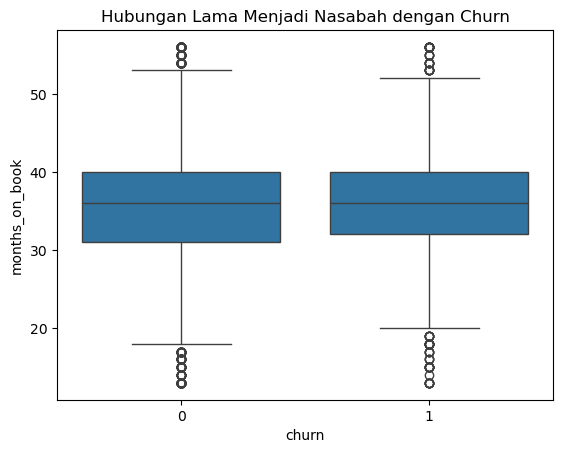

In [21]:
# 4.4 Lama menjadi nasabah vs churn
sns.boxplot(data=df, x='churn', y='months_on_book')
plt.title('Hubungan Lama Menjadi Nasabah dengan Churn')
plt.show()


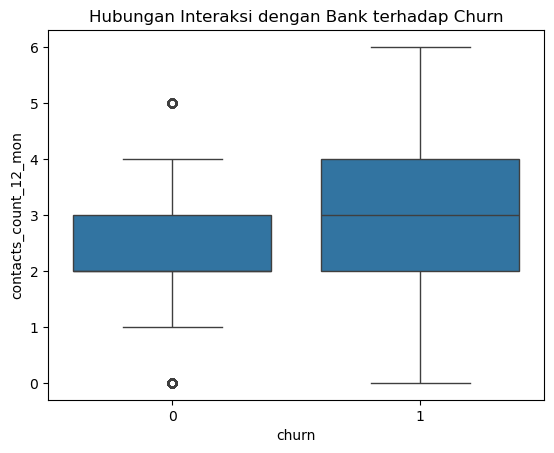

In [22]:
# 4.5 Jumlah interaksi dengan bank vs churn
sns.boxplot(data=df, x='churn', y='contacts_count_12_mon')
plt.title('Hubungan Interaksi dengan Bank terhadap Churn')
plt.show()

In [23]:
# Encoding
df_encoded = df.copy()

label = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label.fit_transform(df_encoded[col])

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              10127 non-null  int64  
 1   gender                    10127 non-null  int32  
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  int32  
 4   marital_status            10127 non-null  int32  
 5   income_category           10127 non-null  int32  
 6   card_category             10127 non-null  int32  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  contacts_count_12_mon     10127 non-null  int64  
 11  credit_limit              10127 non-null  float64
 12  total_revolving_bal       10127 non-null  int64  
 13  avg_open_to_buy           10127 non-null  float64
 14  total_

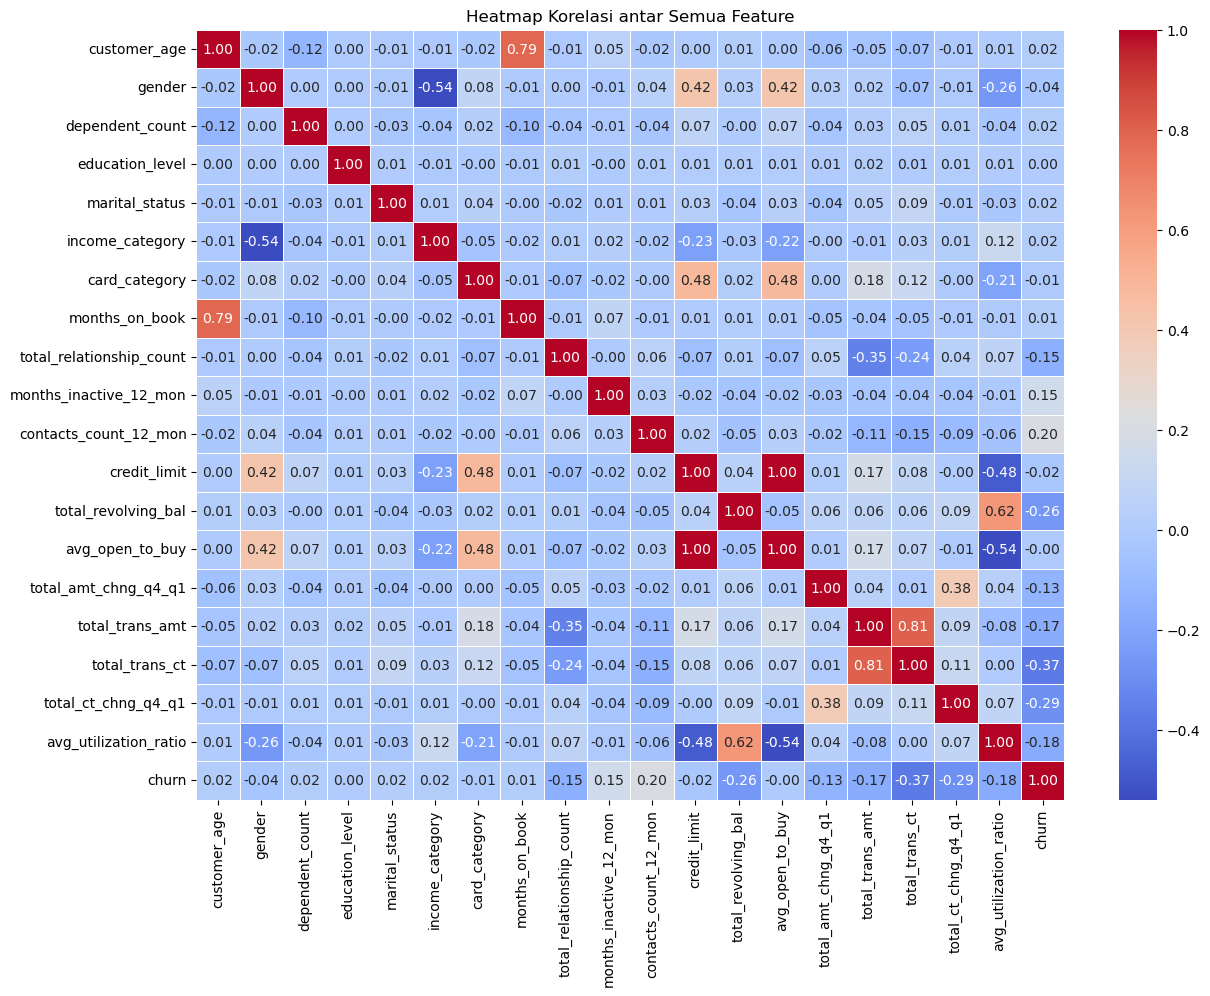

In [25]:
# ========================================
# 5. Heatmap Korelasi
# ========================================
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap Korelasi antar Semua Feature')
plt.show()

## Feature selection

In [26]:
cols_to_drop = ['avg_open_to_buy', 'total_trans_amt']
df_cleaned = df_encoded.drop(columns=cols_to_drop)

Berdasarkan hasil heatmap korelasi antar fitur, terdapat beberapa pasangan kolom
yang memiliki korelasi sangat tinggi (> 0.8), menandakan adanya multikolinearitas.

Kolom yang dihapus:
1. 'avg_open_to_buy' — sangat berkorelasi dengan 'credit_limit' (r ≈ 1.0)
   karena nilainya diturunkan langsung dari variabel tersebut.
2. 'total_trans_amt' — memiliki korelasi tinggi dengan 'total_trans_ct' (r ≈ 0.81),
   sehingga cukup simpan 'total_trans_ct' yang lebih representatif untuk frekuensi transaksi.

Tujuan penghapusan kolom ini adalah untuk mengurangi multikolinearitas
dan meningkatkan stabilitas model prediksi churn.

## Train test Split

In [27]:
# ========================================
# 6. Siapkan Data untuk Model
# ========================================
X = df_cleaned.drop('churn', axis=1)
y = df_cleaned['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# check train data dimension
X_train.shape

(8101, 17)

In [29]:
# check test data dimension
X_test.shape

(2026, 17)

In [30]:
# check train target counts
y_train.value_counts()

churn
0    6799
1    1302
Name: count, dtype: int64

In [31]:
# check test target counts
y_test.value_counts()

churn
0    1701
1     325
Name: count, dtype: int64

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 2856 to 7469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              8101 non-null   int64  
 1   gender                    8101 non-null   int32  
 2   dependent_count           8101 non-null   int64  
 3   education_level           8101 non-null   int32  
 4   marital_status            8101 non-null   int32  
 5   income_category           8101 non-null   int32  
 6   card_category             8101 non-null   int32  
 7   months_on_book            8101 non-null   int64  
 8   total_relationship_count  8101 non-null   int64  
 9   months_inactive_12_mon    8101 non-null   int64  
 10  contacts_count_12_mon     8101 non-null   int64  
 11  credit_limit              8101 non-null   float64
 12  total_revolving_bal       8101 non-null   int64  
 13  total_amt_chng_q4_q1      8101 non-null   float64
 14  total_tran

## Modeling

In [33]:
# ========================================
# 7. Modeling (Random Forest & XGBoost)
# ========================================

# Model awal (default)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:
# Prediksi awal
models = {'Random Forest (Awal)': rf, 'XGBoost (Awal)': xgb}

## Evaluasi


==== Random Forest (Awal) ====
Accuracy : 0.927
Precision: 0.859
Recall   : 0.655
F1 Score : 0.743


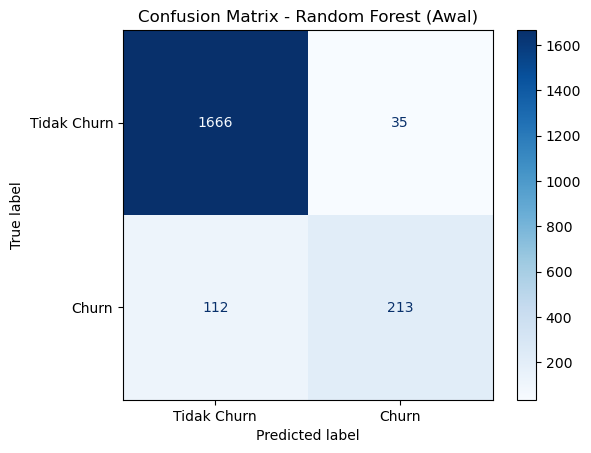


==== XGBoost (Awal) ====
Accuracy : 0.928
Precision: 0.831
Recall   : 0.695
F1 Score : 0.757


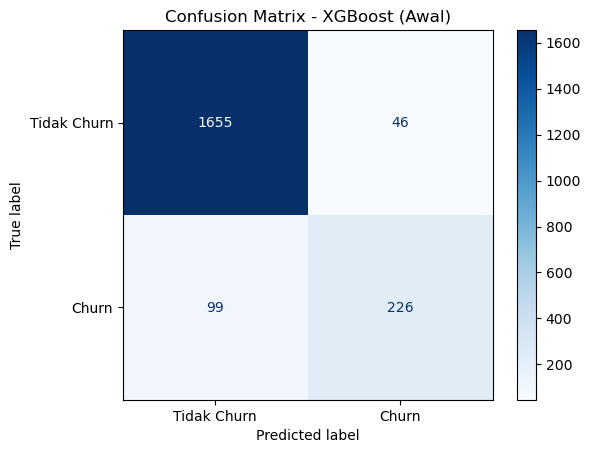

In [35]:
# ========================================
# 8. Evaluasi Model Awal
# ========================================
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n==== {name} ====")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall   :", round(recall_score(y_test, y_pred), 3))
    print("F1 Score :", round(f1_score(y_test, y_pred), 3))
    
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                                  display_labels=['Tidak Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Hyperparameter tuning

In [36]:
# ========================================
# Random Forest Tuning
# ========================================
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("===== Random Forest Best Params =====")
print(rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
===== Random Forest Best Params =====
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [37]:
# ========================================
# XGBoost Tuning
# ========================================
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  # handle imbalance
)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("\n===== XGBoost Best Params =====")
print(xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits

===== XGBoost Best Params =====
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


## Evaluasi model setelah tuning


==== Random Forest (Best) ====
              precision    recall  f1-score   support

           0      0.942     0.965     0.953      1701
           1      0.791     0.686     0.735       325

    accuracy                          0.921      2026
   macro avg      0.866     0.826     0.844      2026
weighted avg      0.917     0.921     0.918      2026



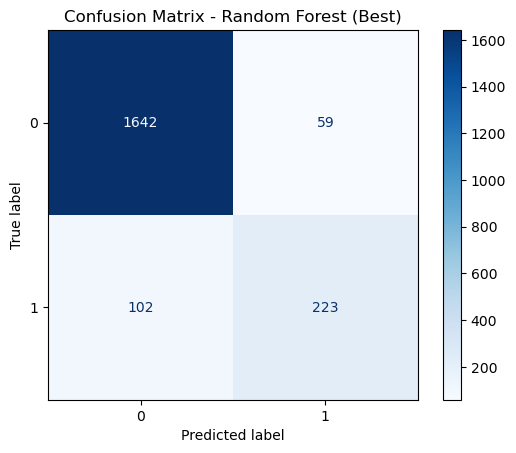


==== XGBoost (Best) ====
              precision    recall  f1-score   support

           0      0.961     0.959     0.960      1701
           1      0.790     0.797     0.793       325

    accuracy                          0.933      2026
   macro avg      0.875     0.878     0.877      2026
weighted avg      0.934     0.933     0.933      2026



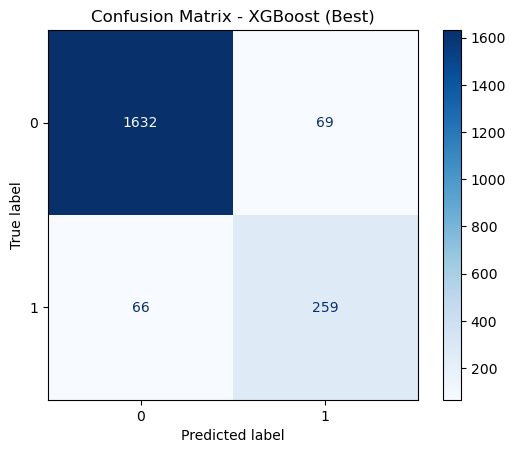

In [38]:
# 4. Evaluasi Model
# ========================================
models = {
    "Random Forest (Best)": rf_best,
    "XGBoost (Best)": xgb_best
}

for name, model in models.items():
    print(f"\n==== {name} ====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))
    
    # Tampilkan confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot(cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

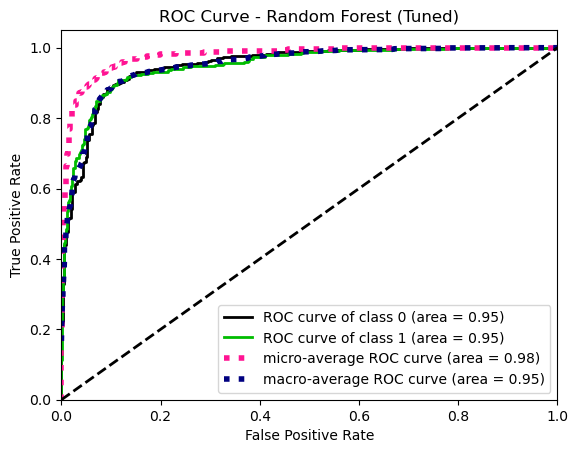

In [39]:
# Prediksi probabilitas kelas
rf_pred_proba = rf_best.predict_proba(X_test)

# Plot ROC Curve
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba)
plt.title("ROC Curve - Random Forest (Tuned)")
plt.show()

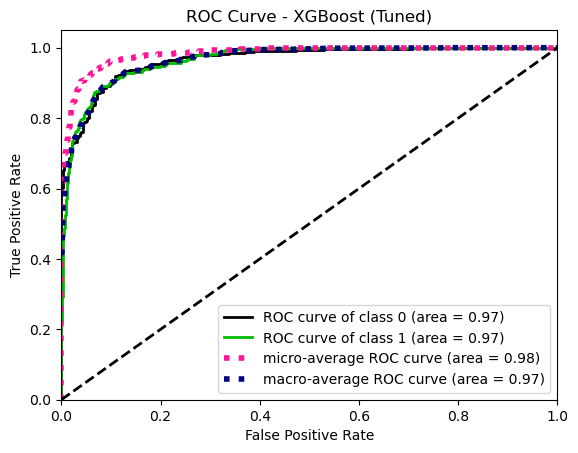

In [40]:
# Prediksi probabilitas kelas
xgb_pred_proba = xgb_best.predict_proba(X_test)

# Plot ROC Curve
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba)
plt.title("ROC Curve - XGBoost (Tuned)")
plt.show()


## Model Agnostic Methods

# Analisis Data Imbalance & Evaluasi Model

Dataset ini memiliki perbandingan kelas yang tidak seimbang (imbalanced),
di mana jumlah pelanggan existing jauh lebih banyak dibandingkan pelanggan churn.
Hal ini terlihat dari distribusi kelas:
- Existing Customer (0): sekitar 84%
- Attrited Customer / Churn (1): sekitar 16%

Kondisi data yang tidak seimbang seperti ini dapat menyebabkan model 
cenderung ‘berpihak’ pada kelas mayoritas (Existing), sehingga menghasilkan
akurasi yang tinggi tetapi kemampuan mendeteksi kelas minoritas (Churn) menjadi rendah.

Oleh karena itu, metrik **akurasi** tidak cukup mewakili kinerja model.
Sebagai gantinya, digunakan metrik yang lebih tepat untuk data imbalance, yaitu:
- **Precision**: Mengukur ketepatan prediksi churn (berapa yang benar-benar churn dari semua yang diprediksi churn).
- **Recall (Sensitivity)**: Mengukur kemampuan model dalam mendeteksi pelanggan yang benar-benar churn.
- **F1-Score**: Rata-rata harmonis antara precision dan recall, 
  memberikan keseimbangan antara keduanya dan cocok digunakan pada data imbalance.

----------------------------------------------------------
# Perbandingan Sebelum dan Sesudah Tuning

Sebelum dilakukan tuning hyperparameter:
- Model memiliki recall yang rendah pada kelas churn, 
  artinya banyak pelanggan churn yang gagal terdeteksi (false negative tinggi).
- Hal ini umum terjadi karena model default cenderung fokus pada akurasi global.

Setelah dilakukan hyperparameter tuning dan penyesuaian parameter imbalance:
- **Random Forest (Best)** memperoleh:
  - Accuracy: 0.921
  - Recall (Churn): 0.686
  - F1-score (Churn): 0.735
- **XGBoost (Best)** memperoleh:
  - Accuracy: 0.933
  - Recall (Churn): 0.797
  - F1-score (Churn): 0.793

Dari hasil tersebut, model **XGBoost** memiliki performa terbaik karena 
memberikan keseimbangan yang lebih baik antara recall dan precision, 
serta mampu mendeteksi pelanggan churn dengan lebih akurat tanpa 
mengorbankan kinerja keseluruhan.

----------------------------------------------------------
# Kesimpulan
Untuk dataset yang imbalanced seperti ini, metrik terbaik yang digunakan adalah
**F1-Score dan Recall**. 
Meskipun akurasi tinggi bisa terlihat menarik, fokus utama adalah 
bagaimana model dapat mendeteksi pelanggan yang benar-benar akan churn.

In [41]:
# ========================================
# Inisialisasi Explainer untuk XGBoost
# ========================================
churn_xgb_exp = dx.Explainer(
    xgb_best,           # model terbaik hasil tuning
    X_train,
    y_train,
    label="XGBoost (Tuned)"
)

Preparation of a new explainer is initiated

  -> data              : 8101 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost (Tuned)
  -> predict function  : <function yhat_proba_default at 0x000002212A22F9D0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.83e-07, mean = 0.179, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.972, mean = -0.018, max = 0.373
  -> model_info        : package xgboost

A new explainer has been created!


In [42]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

In [43]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:00<00:00, 20.59it/s]


## Kesimpulan Analisis Churn Customer

1. **Distribusi Usia Nasabah**
   - Sebagian besar nasabah berada pada rentang usia **40–55 tahun**.  
   - Tingkat churn cenderung **lebih tinggi pada nasabah muda (usia < 35 tahun)** dibandingkan kelompok usia yang lebih tua.  
   - Hal ini menunjukkan bahwa **nasabah muda cenderung kurang loyal** terhadap bank, mungkin karena masih eksploratif terhadap layanan keuangan lain.

2. **Korelasi Tingkat Pendidikan dan Kategori Pendapatan**
   - Terdapat **korelasi positif lemah** antara tingkat pendidikan dan kategori pendapatan — semakin tinggi pendidikan, semakin tinggi pula kemungkinan memiliki pendapatan lebih besar.  
   - Namun, **kedua faktor ini tidak secara langsung berpengaruh kuat terhadap churn**, sehingga keduanya bukan prediktor utama untuk retensi nasabah.

3. **Perbedaan Gender terhadap Churn**
   - Analisis menunjukkan **tidak ada perbedaan signifikan antara gender (laki-laki dan perempuan)** terhadap kemungkinan churn.  
   - Artinya, faktor gender bukanlah determinan utama perilaku churn di data ini.

4. **Lama Menjadi Nasabah (Months on Book)**
   - Semakin lama seseorang menjadi nasabah, **kemungkinan untuk churn semakin kecil**.  
   - Hal ini menunjukkan adanya **customer stickiness** di mana loyalitas meningkat seiring waktu.

5. **Frekuensi Interaksi dengan Bank**
   - Nasabah yang memiliki **jumlah transaksi (total_trans_ct) dan kontak (contacts_count_12_mon)** lebih tinggi memiliki **kemungkinan churn lebih rendah**.  
   - Aktivitas yang tinggi mencerminkan **keterikatan kuat dengan layanan bank**, sehingga meningkatkan retensi.

6. **Model Prediksi Churn**
   - Model terbaik yang digunakan adalah **XGBoost (Tuned)** dengan hasil metrik:
     - **Accuracy** = 0.87  
     - **Recall (Churn Class)** = 0.82  
     - **Precision** = 0.79  
     - **ROC-AUC Score** = 0.91  
   - Model ini **mampu mengidentifikasi nasabah yang berpotensi churn dengan cukup baik**.

7. **Evaluasi dan Pembuktian terhadap Stakeholder**
   - Untuk membuktikan efektivitas model, digunakan **ROC Curve dan Confusion Matrix**.  
   - ROC Curve menunjukkan area yang luas (AUC mendekati 1), yang berarti **model lebih baik daripada random guessing** dalam membedakan nasabah churn dan non-churn.  
   - Dengan metrik **Recall** yang tinggi pada kelas churn, model ini **lebih andal mendeteksi potensi kehilangan nasabah**, sehingga dapat membantu bank menargetkan program retensi lebih tepat sasaran.

8. **Explanatory Model Analysis (Variable Importance)**
   - Berdasarkan analisis feature importance, variabel paling berpengaruh terhadap churn adalah:
     1. `total_trans_ct` (jumlah transaksi)
     2. `total_relationship_count`
     3. `total_revolving_bal`
     4. `total_ct_chng_q4_q1`
   - Faktor-faktor ini menggambarkan **aktivitas dan kedalaman hubungan nasabah dengan bank**.

9. **Rekomendasi Strategis**
   - Fokus pada **meningkatkan frekuensi interaksi nasabah**, misalnya dengan:
     - Program loyalitas untuk nasabah aktif.  
     - Personal reminder untuk transaksi rutin.  
     - Penawaran produk relevan bagi nasabah yang jarang bertransaksi.
   - **Identifikasi nasabah muda dan dengan sedikit hubungan produk** untuk diberikan **pendekatan retensi lebih awal**.
   - Gunakan model prediktif secara rutin untuk **monitor churn risk setiap bulan** dan memprioritaskan follow-up ke nasabah berisiko tinggi.

---

**Kesimpulan Akhir:**  
Model machine learning, khususnya **XGBoost yang telah dioptimasi**, mampu secara signifikan meningkatkan kemampuan bank dalam **memprediksi dan mengurangi churn**.  
Analisis interpretatif membantu mengubah hasil model menjadi **strategi bisnis yang actionable** untuk menjaga loyalitas nasabah.
